In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
titanic = sns.load_dataset('titanic')
titanic

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
5           0       3    male   NaN      0      0    8.4583        Q   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
17          1       2    male   NaN      0      0   13.0000        S  Second   
18          0       3  female  31.0      1      0   18.0000        S   Third   
19          1       3  female   NaN      0      0    7.2250        C   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
26          0       3    male   NaN      0      0    7.2250        C   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
28          1       3  female   NaN      0      0    7.8792        Q   Third   
29          0       3    male   NaN      0      0    7.8958        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
863         0       3  female   NaN      8      2   69.5500        S   Third   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
868         0       3    male   NaN      0      0    9.5000        S   Third   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877         0       3    male  19.0      0      0    7.8958        S   Third   
878         0       3    male   NaN      0      0    7.8958        S   Third   
879  

In [37]:
# 1. deck 컴럼을 삭제하고 나이(age)의 nan 데이터를 삭제 하시요
df = titanic.drop(columns=['deck'])
df.dropna(subset=['age'],inplace=True)
df

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
18          0       3  female  31.0      1      0   18.0000        S   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
30          0       1    male  40.0      0      0   27.7208        C   First   
33          0       2    male  66.0      0      0   10.5000        S  Second   
34          0       1    male  28.0      1      0   82.1708        C   First   
35          0       1    male  42.0      1      0   52.0000        S   First   
37          0       3    male  21.0      0      0    8.0500        S   Third   
38          0       3  female  18.0      2      0   18.0000        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
856         1       1  female  45.0      1      1  164.8667        S   First   
857         1       1    male  51.0      0      0   26.5500        S   First   
858         1       3  female  24.0      0      3   19.2583        C   Third   
860         0       3    male  41.0      2      0   14.1083        S   Third   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877  

In [145]:
# 2. 생존자와 사망자에 대한 갯수를 구하시요
df['survived'][df['survived']==1].count(), df['survived'][df['survived']==0].count()

(290, 424)

In [135]:
# 3. 등급별(pclass) 평균 생존률을 구하시요
(df[ df['survived']==1 ].groupby('pclass').count() / len(df.index))['survived'] * 100

pclass
1    17.086835
2    11.624650
3    11.904762
Name: survived, dtype: float64

In [136]:
# 4. SibSp(가족과탑승) 의 평균 생존율을 구하시요
(df[ df['survived']==1 ].groupby('sibsp').count() / len(df.index)) ['survived'] * 100

sibsp
0    24.509804
1    13.585434
2     1.540616
3     0.560224
4     0.420168
Name: survived, dtype: float64

In [137]:
# 5. 혼자탑승(alone)한 인원의 평균 생존율을 구하시요
(df[ df['survived']==1 ].groupby('alone').count() / len(df.index)) ['survived'][True] * 100

18.207282913165265

In [163]:
# 6. 성별 평균 생존율을 구하시요
(df[ df['survived']==1 ].groupby('sex').count() / len(df.index)) ['survived']* 100
#bysex = df.groupby(['sex','survived']).count()
#bysex.loc['female']

sex
female    27.591036
male      13.025210
Name: survived, dtype: float64

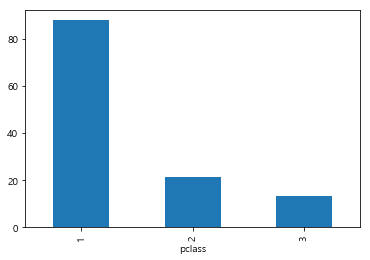

In [68]:
# 7. 등급별 티켓비용(fare) 의 평균 차트로 그리시요
df.groupby('pclass').mean()['fare'].plot(kind='bar')
plt.show()

In [72]:
# 8. 나이분류 컬럼을 추가하시요 
# 1~15(미성년자), 15~25(청년), 25~35(중년), 35~60(장년), 60~(노년)  으로 표시하시요.
df['나이분류'] = df.apply(lambda v: 
         '미성년자' if v['age'] < 15 else 
         '청년' if v['age'] < 25 else 
         '중년' if v['age'] < 35 else 
         '장년' if v['age'] < 60 else
         '노년'
        , axis=1)
df

survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11          1       1  female  58.0      0      0   26.5500        S   First   
12          0       3    male  20.0      0      0    8.0500        S   Third   
13          0       3    male  39.0      1      5   31.2750        S   Third   
14          0       3  female  14.0      0      0    7.8542        S   Third   
15          1       2  female  55.0      0      0   16.0000        S  Second   
16          0       3    male   2.0      4      1   29.1250        Q   Third   
18          0       3  female  31.0      1      0   18.0000        S   Third   
20          0       2    male  35.0      0      0   26.0000        S  Second   
21          1       2    male  34.0      0      0   13.0000        S  Second   
22          1       3  female  15.0      0      0    8.0292        Q   Third   
23          1       1    male  28.0      0      0   35.5000        S   First   
24          0       3  female   8.0      3      1   21.0750        S   Third   
25          1       3  female  38.0      1      5   31.3875        S   Third   
27          0       1    male  19.0      3      2  263.0000        S   First   
30          0       1    male  40.0      0      0   27.7208        C   First   
33          0       2    male  66.0      0      0   10.5000        S  Second   
34          0       1    male  28.0      1      0   82.1708        C   First   
35          0       1    male  42.0      1      0   52.0000        S   First   
37          0       3    male  21.0      0      0    8.0500        S   Third   
38          0       3  female  18.0      2      0   18.0000        S   Third   
..        ...     ...     ...   ...    ...    ...       ...      ...     ...   
856         1       1  female  45.0      1      1  164.8667        S   First   
857         1       1    male  51.0      0      0   26.5500        S   First   
858         1       3  female  24.0      0      3   19.2583        C   Third   
860         0       3    male  41.0      2      0   14.1083        S   Third   
861         0       2    male  21.0      1      0   11.5000        S  Second   
862         1       1  female  48.0      0      0   25.9292        S   First   
864         0       2    male  24.0      0      0   13.0000        S  Second   
865         1       2  female  42.0      0      0   13.0000        S  Second   
866         1       2  female  27.0      1      0   13.8583        C  Second   
867         0       1    male  31.0      0      0   50.4958        S   First   
869         1       3    male   4.0      1      1   11.1333        S   Third   
870         0       3    male  26.0      0      0    7.8958        S   Third   
871         1       1  female  47.0      1      1   52.5542        S   First   
872         0       1    male  33.0      0      0    5.0000        S   First   
873         0       3    male  47.0      0      0    9.0000        S   Third   
874         1       2  female  28.0      1      0   24.0000        C  Second   
875         1       3  female  15.0      0      0    7.2250        C   Third   
876         0       3    male  20.0      0      0    9.8458        S   Third   
877  

In [104]:
# 10. 나이분류를 파이차트로 표시하시요
df.groupby('나이분류').count().plot(y='survived', kind='pie')
plt.show()

In [117]:
# 11. 생존율이 가장 높은 나이분류를 구하시요
(df[ df['survived']==1 ].groupby('나이분류').count() / df.groupby('나이분류').count()).sort_values(by='survived', ascending=False).index[0]

'미성년자'

In [151]:
# 12. 성별, 나이분류별, 등급(pclass)를 멀티인덱스로, 생존률을 값으로 표시하시요
df.pivot_table(index=['sex','나이분류','pclass'])[['survived',]]* 100

survived
sex    나이분류 pclass            
female 노년   1       100.000000
            3       100.000000
       미성년자 1        50.000000
            2       100.000000
            3        48.148148
       장년   1        97.560976
            2        85.714286
            3        20.000000
       중년   1        92.857143
            2        92.307692
            3        43.478261
       청년   1       100.000000
            2        94.117647
            3        55.555556
male   노년   1        14.285714
            2        25.000000
            3         0.000000
       미성년자 1       100.000000
            2       100.000000
            3        33.333333
       장년   1        40.000000
            2         3.571429
            3         6.122449
       중년   1        55.000000
            2         8.333333
            3        20.731707
       청년   1        22.222222
            2         4.545455
            3         9.890110